In [25]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
standards_change = pd.read_excel('../Too_Large/marathon_standards_change_analysis.xlsx', 
                       sheet_name='standards_change')
standards_change.shape

(96, 6)

In [3]:
standards_change.dtypes

Age             int64
Male (s)        int64
Men           float64
Female        float64
Female (s)      int64
Women         float64
dtype: object

In [11]:
bos_ages = standards_change[(standards_change['Age']>17) & (standards_change['Age']<86)]
bos_ages.tail()

Age  Male (s)       Men   Female   Female (s)     Women
76   81       -67 -1.116667 -0.003755        -324 -5.400000
77   82       -67 -1.116667 -0.003950        -341 -5.683333
78   83       -71 -1.183333 -0.004135        -357 -5.950000
79   84       -71 -1.183333 -0.004348        -376 -6.266667
80   85       -71 -1.183333 -0.004642        -401 -6.683333

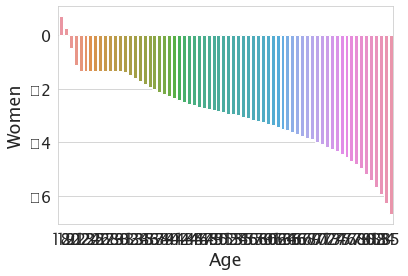

In [23]:
ax = sns.barplot(x="Age", y="Women", data=bos_ages)

In [14]:
standards_change_alt = pd.read_excel('../Too_Large/marathon_standards_change_analysis.xlsx', 
                       sheet_name='standards_change_alt')
standards_change_alt.shape

(192, 4)

In [15]:
bos_ages_alt = standards_change_alt[(standards_change_alt['Age']>17) & (standards_change_alt['Age']<86)]
bos_ages_alt.tail()

Age Gender  Time(s)   Time(m)
172   81      F     -324 -5.400000
173   82      F     -341 -5.683333
174   83      F     -357 -5.950000
175   84      F     -376 -6.266667
176   85      F     -401 -6.683333

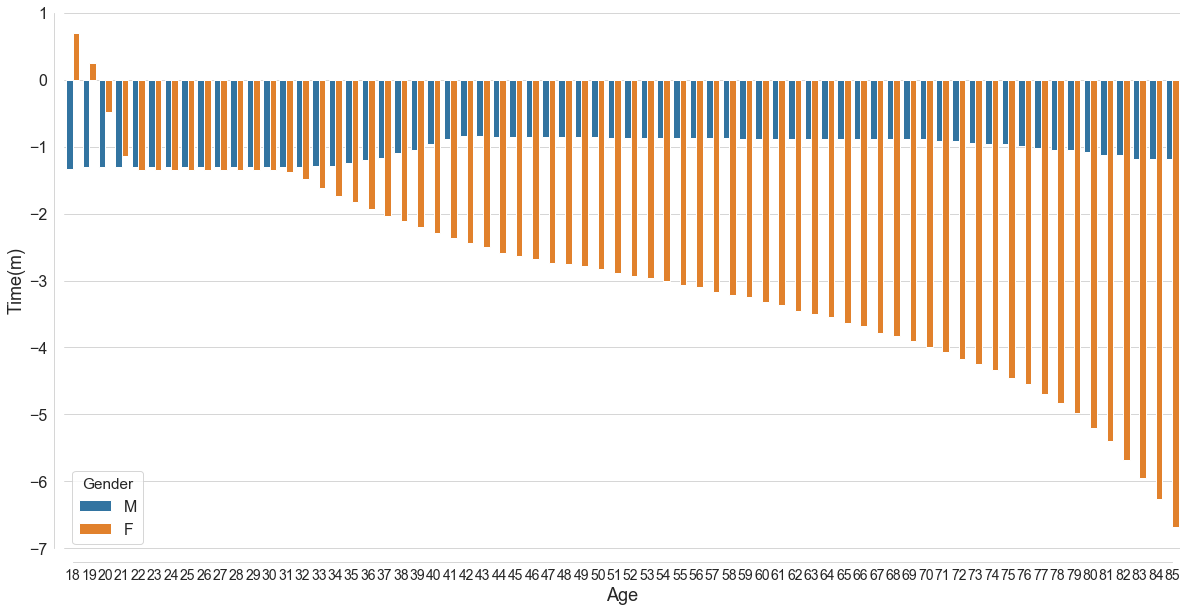

In [28]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

#plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(20,10))
ax = sns.barplot(x="Age", y="Time(m)", hue="Gender", data=bos_ages_alt)
sns.despine(offset=10, trim=True)
plt.savefig('standards_change_minutes.png');

In [37]:
#143.51-445.65 Official_Time range females
#140.85-395.79 2020_AG_Result range females
#use 140-450
min(bos_19['2020_AG_Result_minutes'])

127.74512833333331

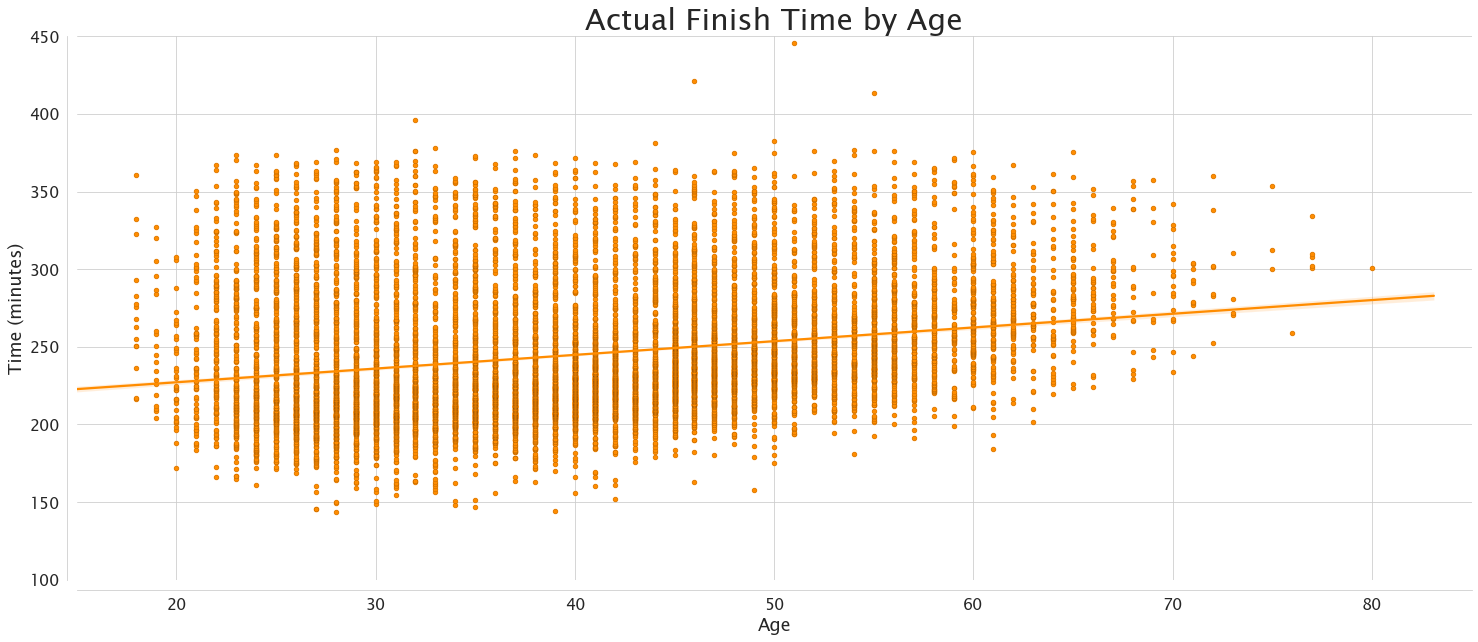

In [11]:
plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(25,10))
sns.regplot(x='Age', y='Official_Time_minutes',
            color='darkorange', data=females, scatter_kws={'s':20}) 
ax = sns.scatterplot(x="Age", y="Official_Time_minutes",
                     data=females, s=20, linewidth=.1, color='darkorange', edgecolor="black")
plt.title('Actual Finish Time by Age', fontsize=30)
plt.xlabel('Age')
plt.ylabel('Time (minutes)')
plt.ylim(100, 450)
plt.xlim(15, 85)
sns.despine(offset=10, trim=False)
plt.savefig('actual_finish_by_age_F.png');

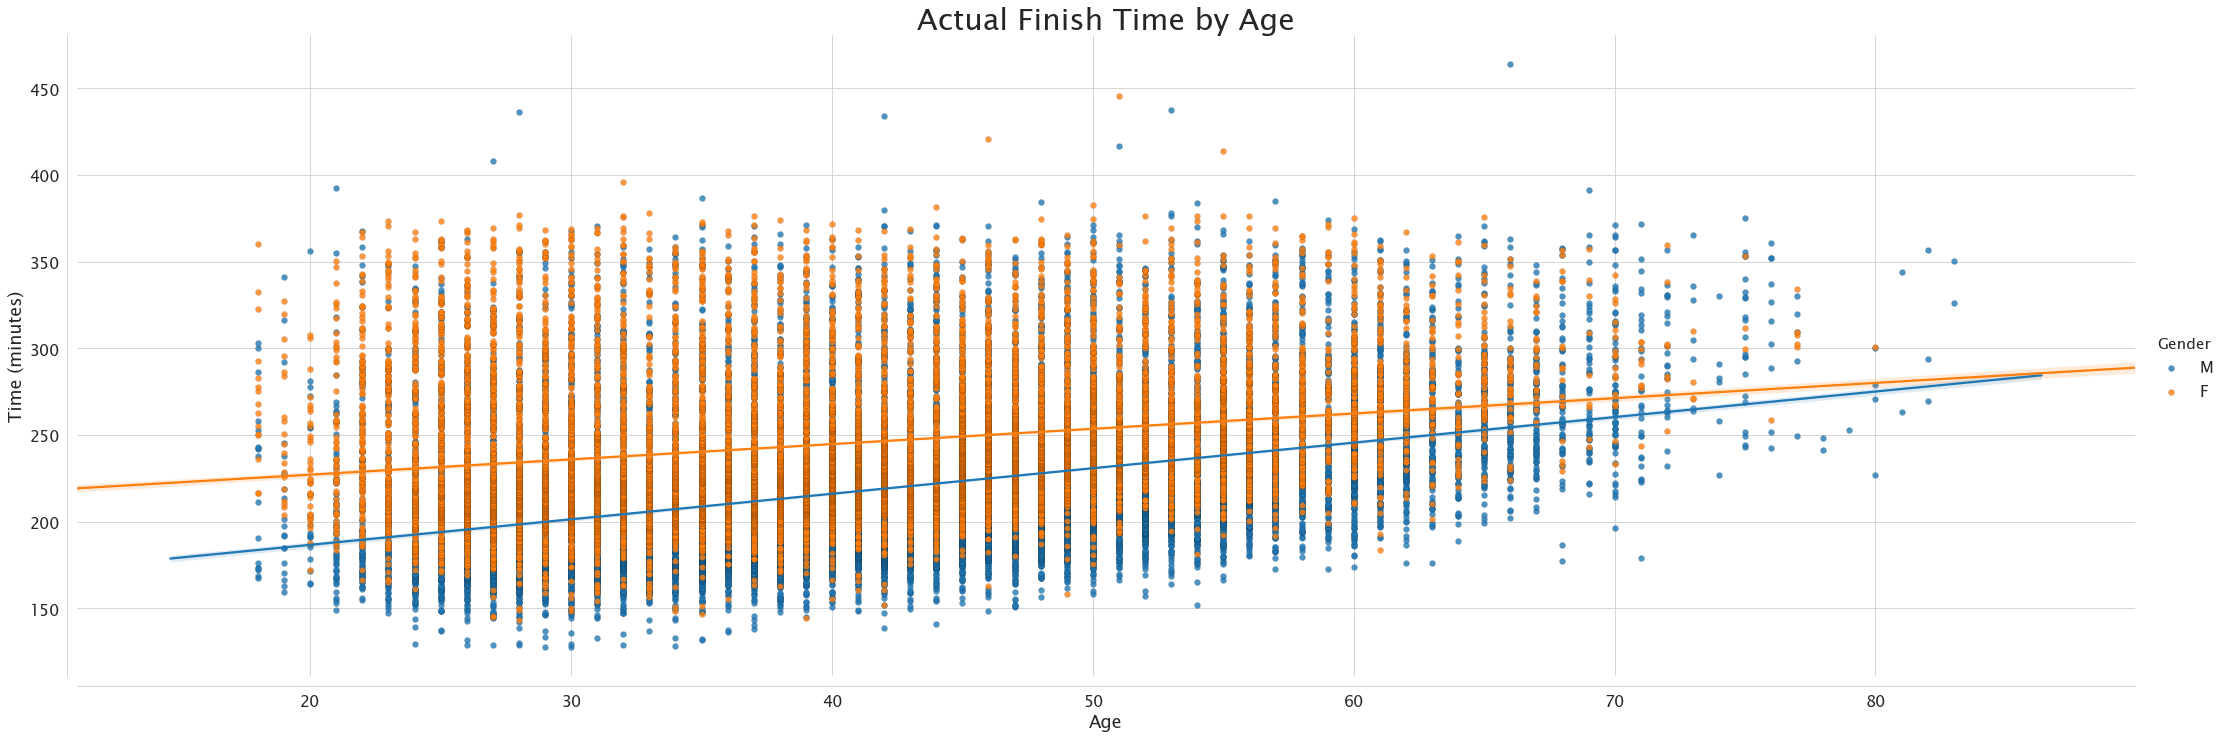

In [52]:
plt.rcParams['font.sans-serif'] = "Lucida Sans"
sns.lmplot(x="Age", y="Official_Time_minutes", hue="Gender", data=bos_19, height=10, aspect=3, scatter_kws={'linewidths':.11,'edgecolor':'k'});

#ax = sns.scatterplot(x="Age", y="Official_Time_minutes", hue='Gender',
 #                    data=bos_19, s=20, linewidth=.1, edgecolor="black")
plt.title('Actual Finish Time by Age', fontsize=30)
plt.xlabel('Age')
plt.ylabel('Time (minutes)')
#plt.ylim(100, 450)
#plt.xlim(15, 85)
sns.despine(offset=10, trim=False)
#plt.savefig('actual_finish_by_age_F.png');



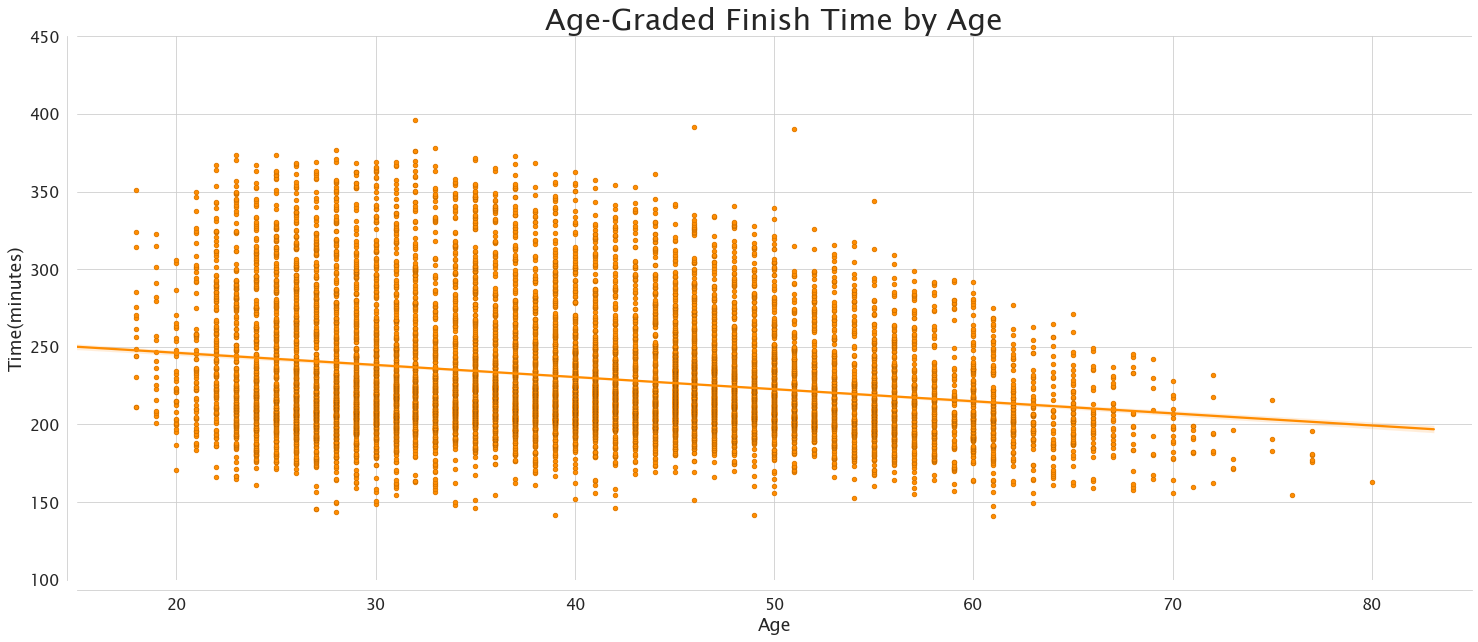

In [12]:
plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(25,10))
sns.regplot(x='Age', y='2020_AG_Result_minutes',
            color='darkorange', data=females, scatter_kws={'s':20}) 
ax = sns.scatterplot(x="Age", y="2020_AG_Result_minutes",
                     data=females, s=20, linewidth=.1, color='darkorange', edgecolor="black")
plt.title('Age-Graded Finish Time by Age', fontsize=30)
plt.xlabel('Age')
plt.ylabel('Time(minutes)')
plt.ylim(100, 450)
plt.xlim(15, 85)

sns.despine(offset=10, trim=False);
plt.savefig('AGfinish_by_age_F.png');

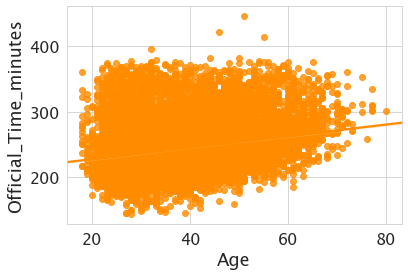

In [47]:
#use

ax = sns.scatterplot(x="Age", y="Official_Time_minutes", hue="Gender",
                     data=bos_19[bos_19['Gender'].isin(['F'])], )

#s=30, linewidth=.5, edgecolor="white"

#use
#plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="Age Group", y="Official_Time_minutes",
                   data=females, color="navajowhite", dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax = sns.stripplot(x="Age Group", y="2020_AG_Result_minutes",
                   data=females, color="darkorange", dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax.axhline(240, color='r', linewidth=4)
ax.axhline(180, color='r', linewidth=4)
ax.axhline(y=300, xmin=0, xmax=0.1)
ax.grid(False)
plt.title('Age-Graded Finish Time by Age Group',fontsize=30)
plt.ylabel('Time (minutes)')
sns.despine(offset=10, trim=True)
plt.savefig('AGfinish_by_agegroup_F.png');

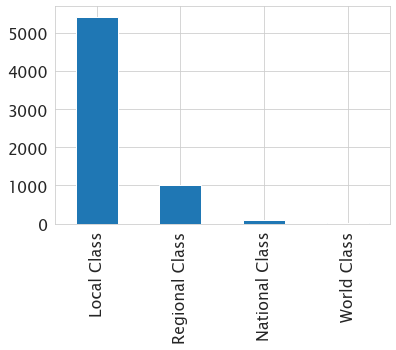

In [27]:
females['AG_class'].value_counts().plot(kind='bar')

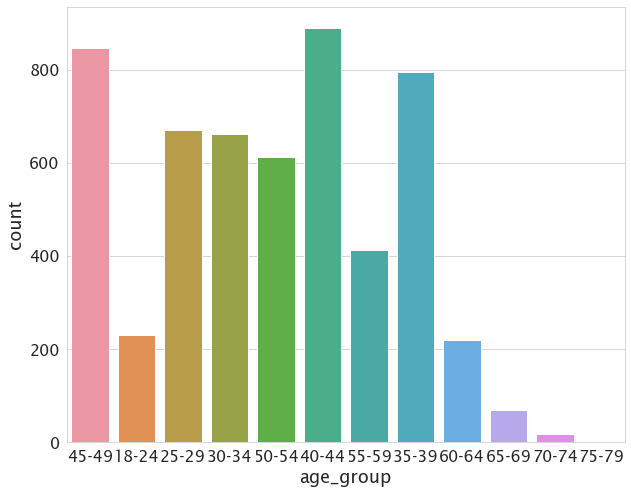

In [35]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="age_group", data=females[females['AG_class'].isin(['Local Class'])])

In [283]:
nationalclass = bos_19[bos_19['AG%>=80%'].isin(['1'])]
nationalclass.head()

Age Gender  Official_Time_minutes Official_Time  Overall  Gender2  \
22   32      M             135.483333      02:15:29       17       17   
23   30      M             135.966667      02:15:58       18       18   
24   37      M             138.016667      02:18:01       25       25   
25   36      M             137.616667      02:17:37       23       23   
26   29      M             136.766667      02:16:46       20       20   

    Division  2020_AG_%  2020_AG_Result_minutes   2020_AG_Result  ...  \
22        17   0.898076              135.456237  02:15:27.374000  ...   
23        18   0.894705              135.966667         02:15:58  ...   
24        25   0.893025              136.222450  02:16:13.347000  ...   
25        23   0.891915              136.391878  02:16:23.513000  ...   
26        20   0.889471              136.766667         02:16:46  ...   

    2020_Age-graded_gender_place  Age Group Top_1%_Overall  Top_1%_Gender  \
22                            23      18-39              1              1   
23                            24      18-39              1              1   
24                            25      18-39              1              1   
25                            26      18-39              1              1   
26                            27      18-39              1              1   

    Top_1%_Overall_AG  Top_1%_Gender_AG  AG%>=90%  AG%>=80%  AG%>=70%  \
22                  1                 1         0         1         0   
23                  1                 1         0         1         0   
24                  1                 1         0         1         0   
25                  1                 1         0         1         0   
26                  1                 1         0         1         0   

    AG%>=60%  
22         0  
23         0  
24         0  
25         0  
26         0  

[5 rows x 21 columns]

In [328]:
by_AGperc = (females
           .groupby('2020_AG_%')
            .filter(lambda x : len(x) >= .9)
            .groupby(['Gender', 'Age Group'])
            .size()
            .unstack()
           )
by_AGperc

Age Group  18-39  40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80+
Gender                                                                       
F           5660   1840   1835   1200    828    430    141     37      9    1

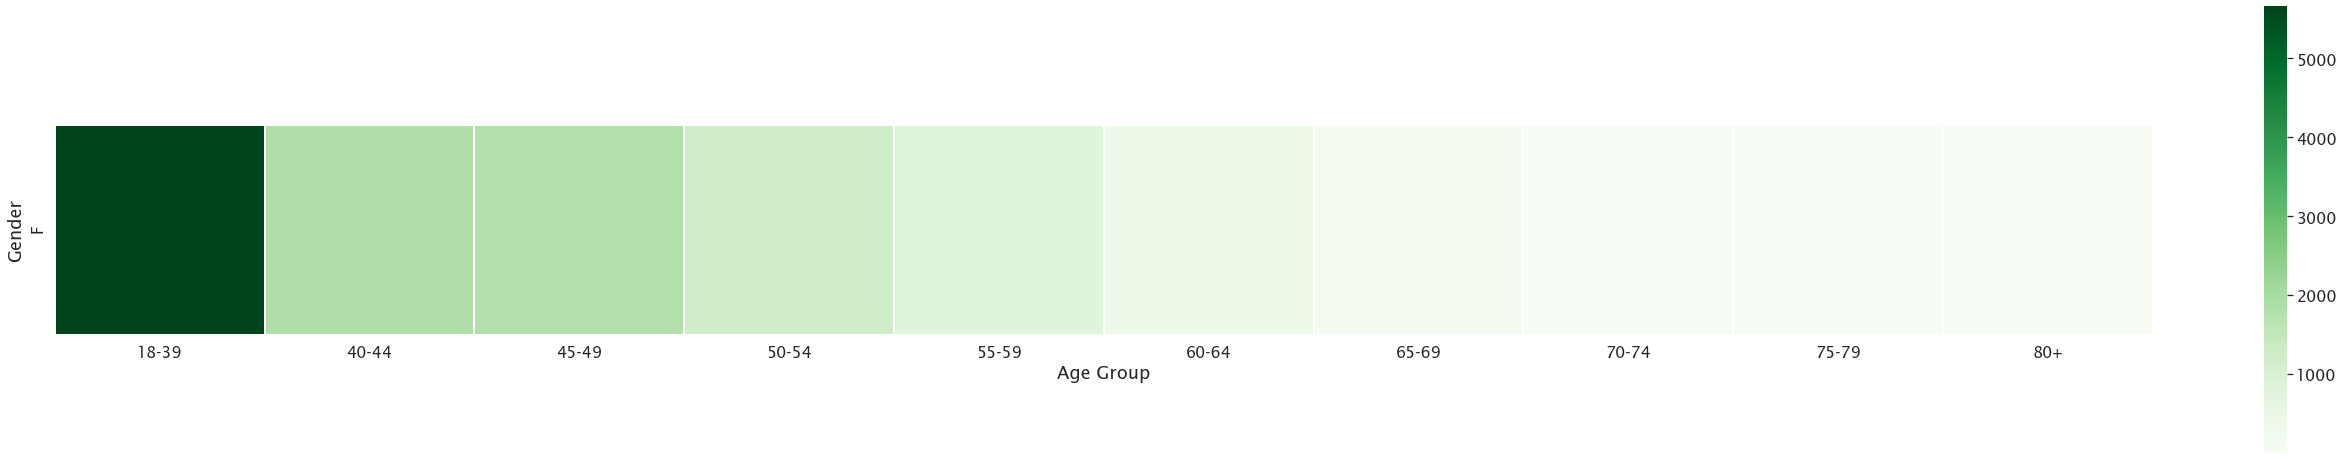

In [330]:
plt.figure(figsize=(40,40))
g = sns.heatmap(
    by_AGperc, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='Greens', # use orange/red colour map
    linewidth=1 # space between cells
)

In [ ]:
by_AGperc = (females
           # .groupby('Division')
            #.filter(lambda x : len(x) < 10)
            .groupby(['Gender', 'Age Group'])
            .size()
            .unstack()
           )
by_AGperc

In [ ]:
plt.figure(figsize=(10,10))
g = sns.heatmap(
    by_AGperc, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells

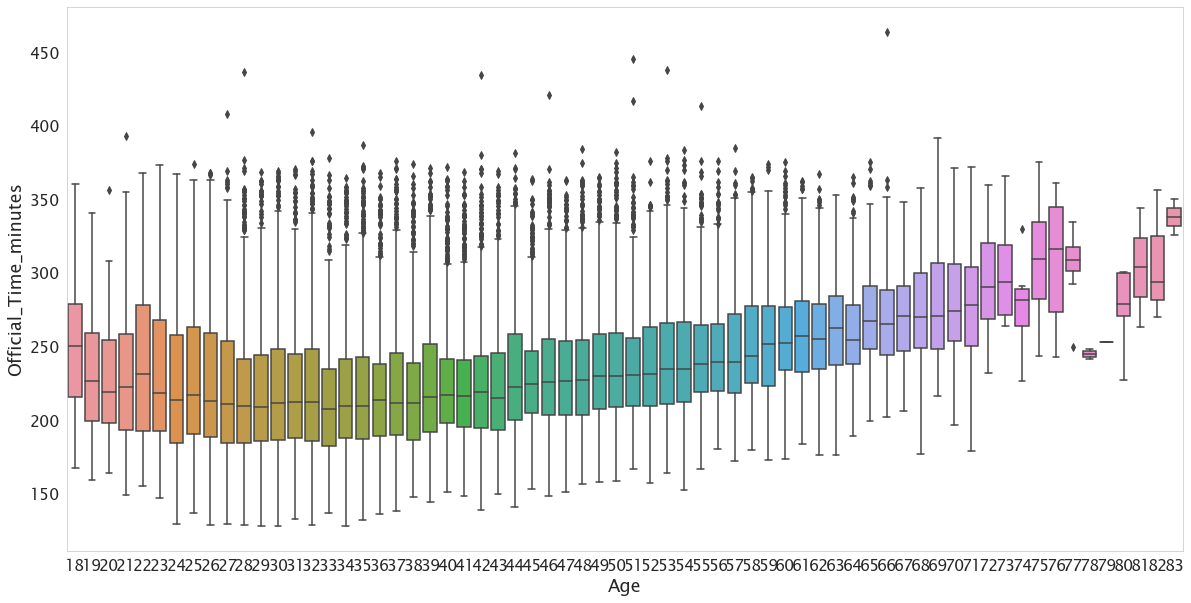

In [124]:
plt.figure(figsize=(20,10))
sns.boxplot( x=bos_19['Age'], y=bos_19["Official_Time_minutes"] )


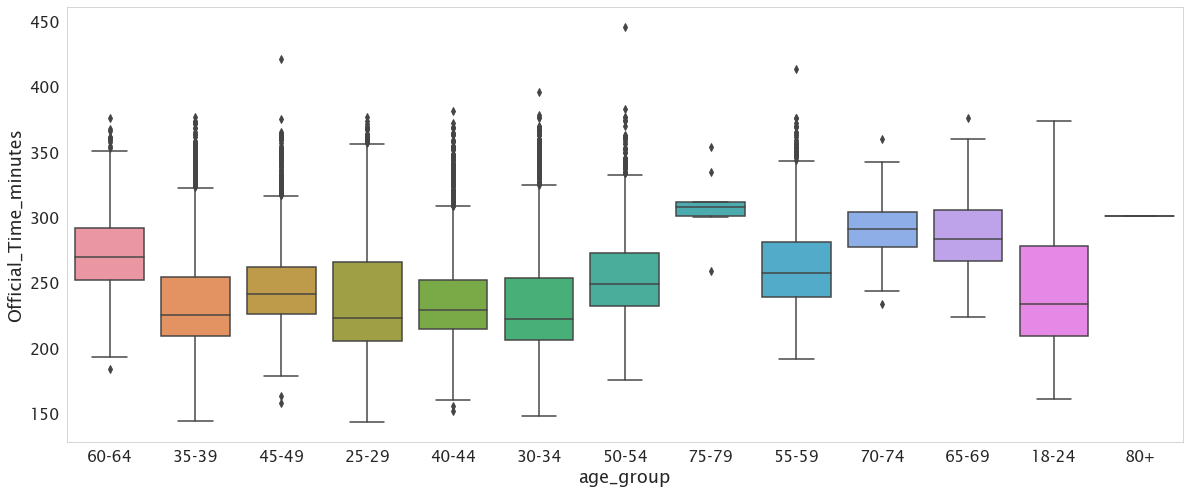

In [123]:
plt.figure(figsize=(20,8))
sns.boxplot( x=females['age_group'], y=females["Official_Time_minutes"] )

#sns.plt.show()


Text(0, 0.5, 'Time (min)')

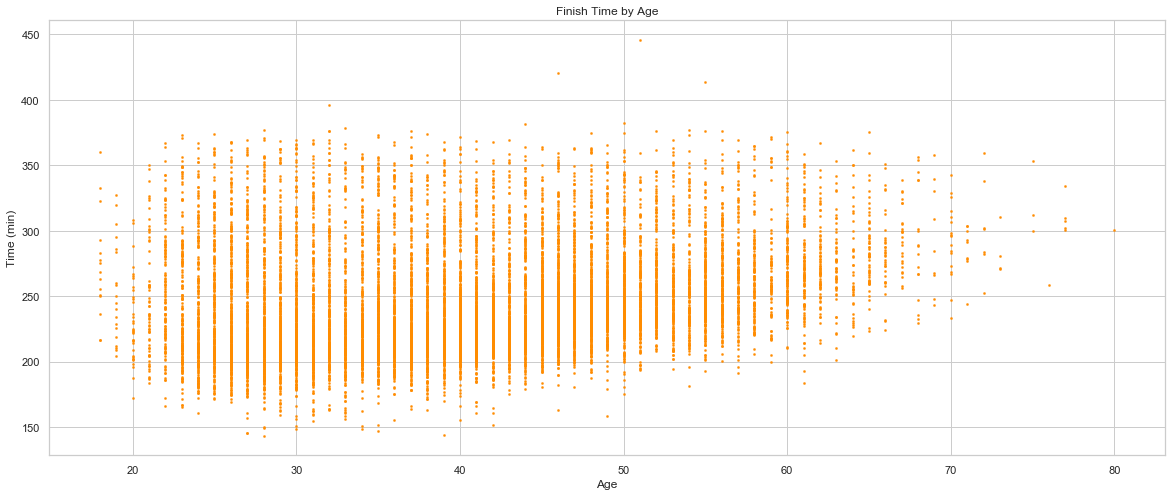

In [117]:
#sns.set(style="darkgrid")
sns.set_style("whitegrid")

plt.figure(figsize=(20,8))
ax = sns.scatterplot(x="Age", y="Official_Time_minutes",
                     data=females, s=5, color ="darkorange", linewidth=.3, edgecolor="darkorange")
plt.title('Finish Time by Age')
plt.xlabel('Age')
plt.ylabel('Time (min)')
#plt.savefig('finishbyage.png');

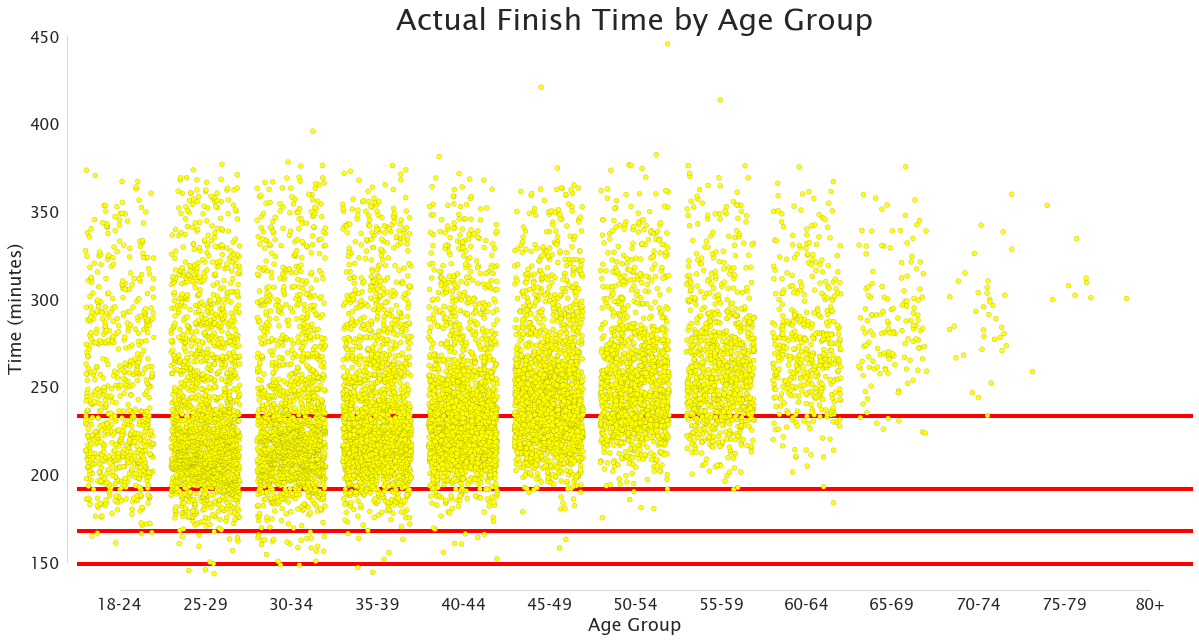

In [57]:
#World Class 148.96
#National Class 167.58
#Regional Class 191.52
#Local Class 223.44

#use
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="age_group", y="Official_Time_minutes",
                   data=females, color="yellow", dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax.axhline(148.96, color='r', linewidth=4)
ax.axhline(167.58, color='r', linewidth=4)
ax.axhline(191.52, color='r', linewidth=4)
ax.axhline(233.44, color='r', linewidth=4)
plt.ylim(140, 450)
ax.grid(False)
plt.title('Actual Finish Time by Age Group',fontsize=30)
plt.xlabel('Age Group')
plt.ylabel('Time (minutes)')
sns.despine(offset=10, trim=True)
plt.savefig('finish_by_agegroup_F_yellow.png');

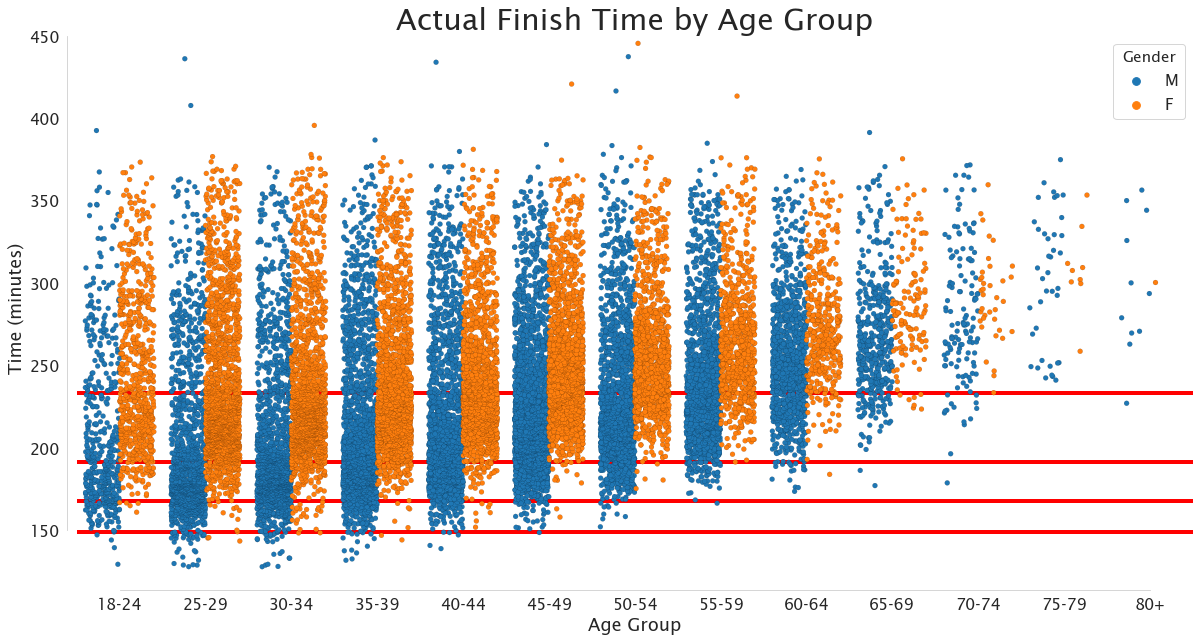

In [38]:
#World Class 148.96
#National Class 167.58
#Regional Class 191.52
#Local Class 223.44

#use
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="age_group", y="Official_Time_minutes", hue="Gender",
                   data=bos_19, dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax.axhline(148.96, color='r', linewidth=4)
ax.axhline(167.58, color='r', linewidth=4)
ax.axhline(191.52, color='r', linewidth=4)
ax.axhline(233.44, color='r', linewidth=4)
plt.ylim(120, 450)
ax.grid(False)
plt.title('Actual Finish Time by Age Group',fontsize=30)
plt.xlabel('Age Group')
plt.ylabel('Time (minutes)')
sns.despine(offset=10, trim=True)
plt.savefig('finish_by_agegroup_both.png');

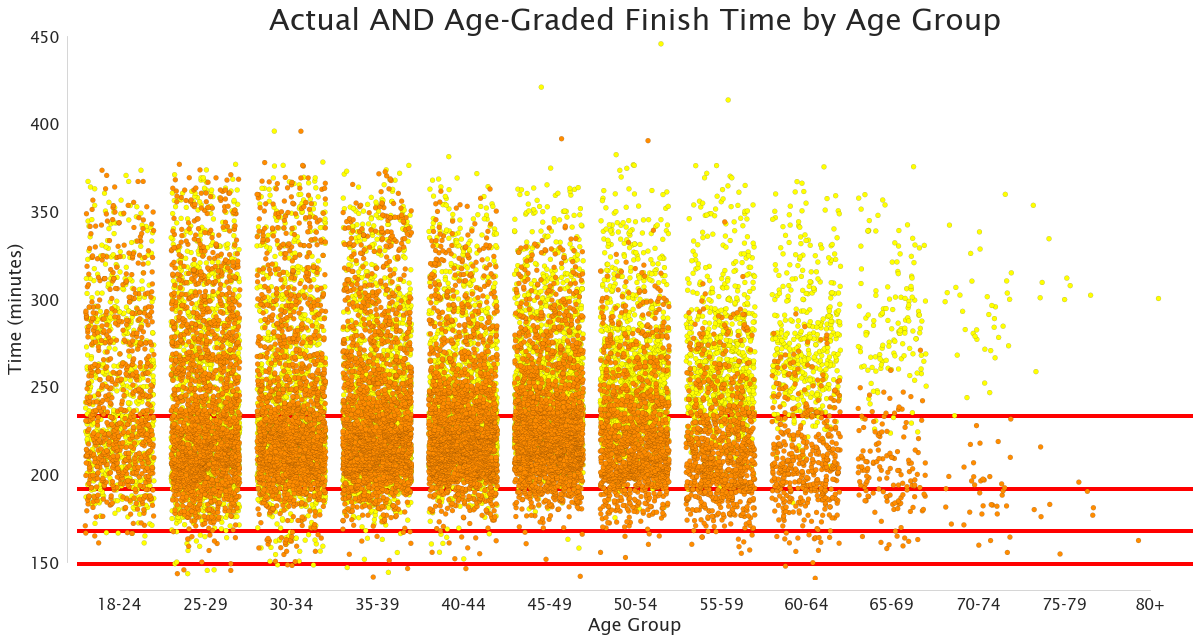

In [56]:
#use
#plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="age_group", y="Official_Time_minutes",
                   data=females, color="yellow", dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax = sns.stripplot(x="age_group", y="2020_AG_Result_minutes",
                   data=females, color="darkorange", dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax.axhline(148.96, color='r', linewidth=4)
ax.axhline(167.58, color='r', linewidth=4)
ax.axhline(191.52, color='r', linewidth=4)
ax.axhline(233.44, color='r', linewidth=4)
#ax.axhline(y=300, xmin=0, xmax=0.1)
ax.grid(False)
plt.ylim(140, 450)
plt.title('Actual AND Age-Graded Finish Time by Age Group',fontsize=30)
plt.xlabel('Age Group')
plt.ylabel('Time (minutes)')
sns.despine(offset=10, trim=True)
plt.savefig('actual_and_AGfinish_by_agegroup_F.png');

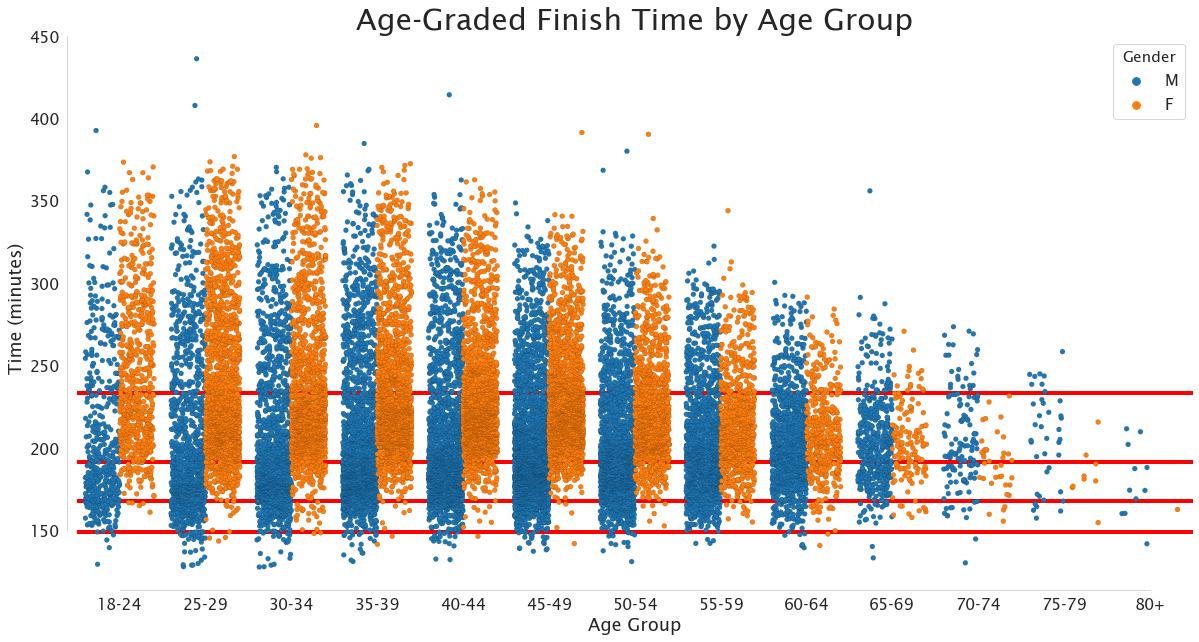

In [39]:
#use
#plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(20,10))
#ax = sns.stripplot(x="age_group", y="Official_Time_minutes",
 #                  data=females, color="darkorange", dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax = sns.stripplot(x="age_group", y="2020_AG_Result_minutes", hue='Gender',
                   data=bos_19, dodge=True, jitter=0.4, size=5, linewidth=.1, edgecolor="black", order=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax.axhline(148.96, color='r', linewidth=4)
ax.axhline(167.58, color='r', linewidth=4)
ax.axhline(191.52, color='r', linewidth=4)
ax.axhline(233.44, color='r', linewidth=4)
#ax.axhline(y=300, xmin=0, xmax=0.1)
ax.grid(False)
plt.ylim(120, 450)
plt.title('Age-Graded Finish Time by Age Group',fontsize=30)
plt.xlabel('Age Group')
plt.ylabel('Time (minutes)')
sns.despine(offset=10, trim=True)
plt.savefig('AGfinish_by_agegroup_both.png');

[Text(0, 0, '18-39'),
 Text(0, 0, '40-44'),
 Text(0, 0, '45-49'),
 Text(0, 0, '50-54'),
 Text(0, 0, '55-59'),
 Text(0, 0, '60-64'),
 Text(0, 0, '65-69'),
 Text(0, 0, '70-74'),
 Text(0, 0, '75-79'),
 Text(0, 0, '80+')]

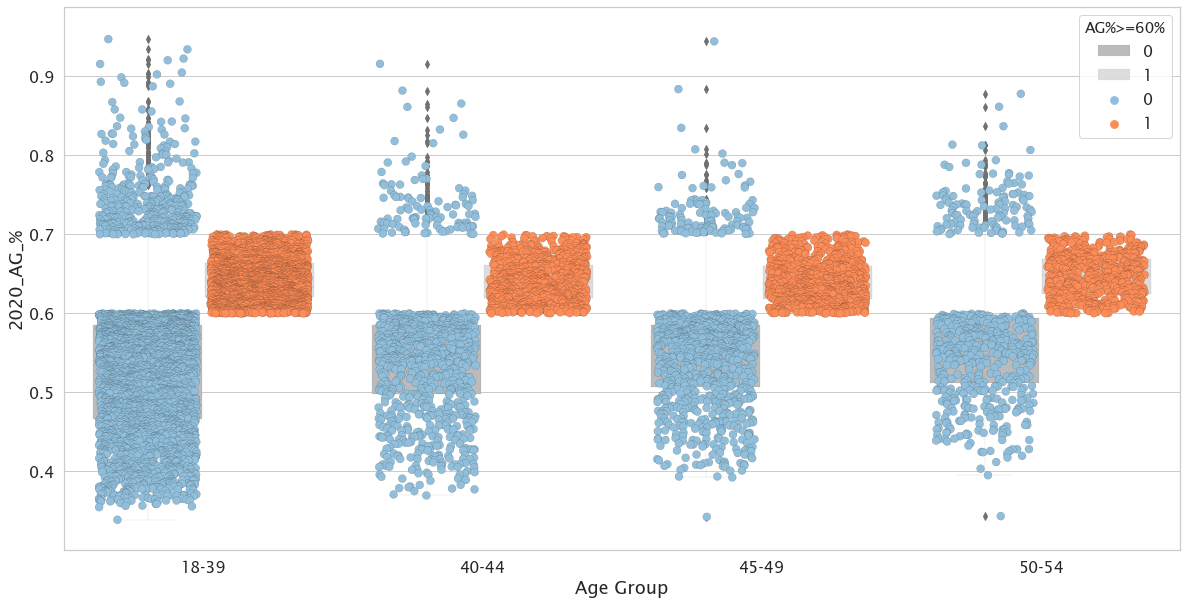

In [225]:
plt.rcParams['font.size'] = 30
plt.figure(figsize=(20,10))
params = dict(data=females,
              x='Age Group',
              y='2020_AG_%',
              hue='AG%>=60%',
              #jitter=0.25,
              order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"],
              dodge=True)
p = sns.stripplot(size=8,
                  jitter=0.35,
                  palette=['#91bfdb','#fc8d59'],
                  edgecolor='black',
                  linewidth=.1,
                  **params)
p_box = sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=.1,**params)
handles,labels = p.get_legend_handles_labels()
#for h in handles:
#    h.set_height(3)
#handles[2].set_linewidth(33)

#plt.legend(handles[2:],
 #          labels[2:],
  #         bbox_to_anchor = (.3,.95),
   #        fontsize = 40,
    #       markerscale = 5,
     #      frameon=False,
      #     labelspacing=0.2)
#plt.text(1.85,35, "Strip Plot", fontsize = 95, color='Black', fontstyle='italic')
#plt.xlabel('')
#plt.ylabel('Shot Distance (ft)')
plt.gca().set_xlim(-0.5,3.5)
xlabs = p.get_xticklabels()
xlabs[0].set_text('18-39')
for l in xlabs[1:]:
    l.set_text(" ".join(i.capitalize() for i in l.get_text().split() ))
p.set_xticklabels(xlabs)

In [227]:
females_worldclass = bos_19[bos_19['AG%>=90%'].isin(['1'])]
females_worldclass.head()

Age Gender  Official_Time_minutes Official_Time  Overall  Gender2  \
0   34      M             128.116667      02:08:07        3        3   
1   30      M             127.950000      02:07:57        1        1   
2   29      M             127.983333      02:07:59        2        2   
3   32      M             128.900000      02:08:54        4        4   
4   26      M             128.916667      02:08:55        5        5   

   Division  2020_AG_%  2020_AG_Result_minutes   2020_AG_Result  ...  \
0         3   0.952287              127.745128  02:07:44.708000  ...   
1         1   0.950762              127.950000         02:07:57  ...   
2         2   0.950514              127.983333         02:07:59  ...   
3         4   0.943944              128.874220  02:08:52.453000  ...   
4         5   0.943633              128.916667         02:08:55  ...   

   2020_Age-graded_gender_place  Age Group Top_1%_Overall  Top_1%_Gender  \
0                             1      18-39              1              1   
1                             2      18-39              1              1   
2                             3      18-39              1              1   
3                             4      18-39              1              1   
4                             5      18-39              1              1   

   Top_1%_Overall_AG  Top_1%_Gender_AG  AG%>=90%  AG%>=80%  AG%>=70%  AG%>=60%  
0                  1                 1         1         0         0         0  
1                  1                 1         1         0         0         0  
2                  1                 1         1         0         0         0  
3                  1                 1         1         0         0         0  
4                  1                 1         1         0         0         0  

[5 rows x 21 columns]

Text(0, 0.5, 'Time')

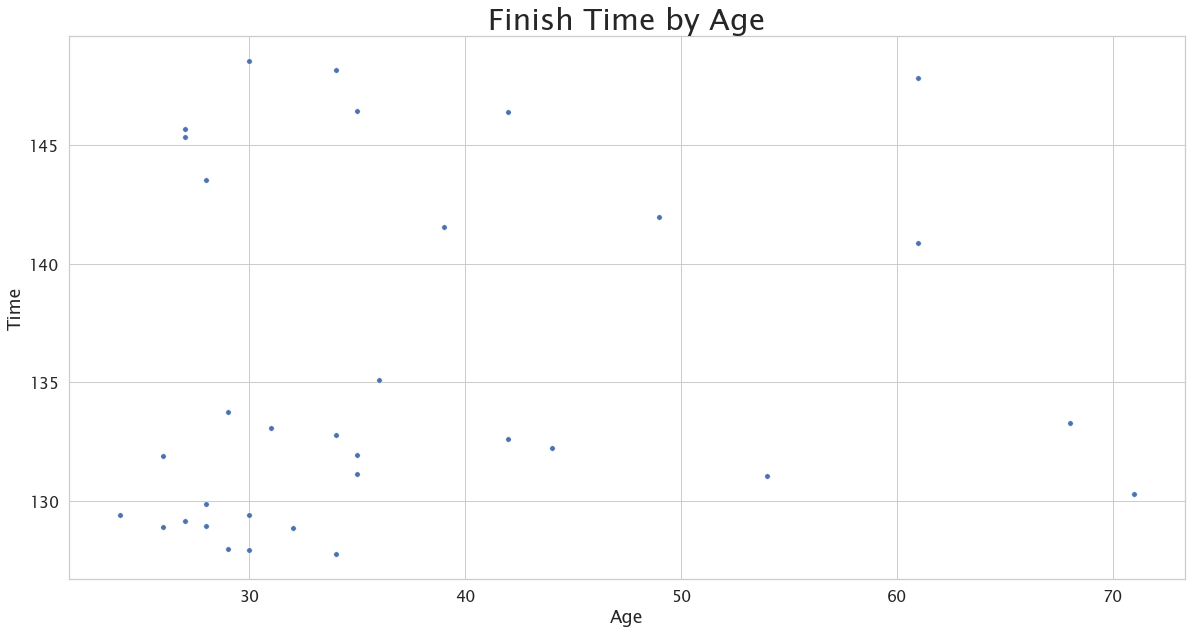

In [230]:
#use
#sns.set(style="darkgrid")
plt.rcParams['font.sans-serif'] = "Lucida Sans"
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="Age", y="2020_AG_Result_minutes",
                     data=females_worldclass, s=30, linewidth=.5, edgecolor="white")
plt.title('Finish Time by Age', fontsize=30)
plt.xlabel('Age')
plt.ylabel('Time')
#plt.savefig('finishbyage.png');

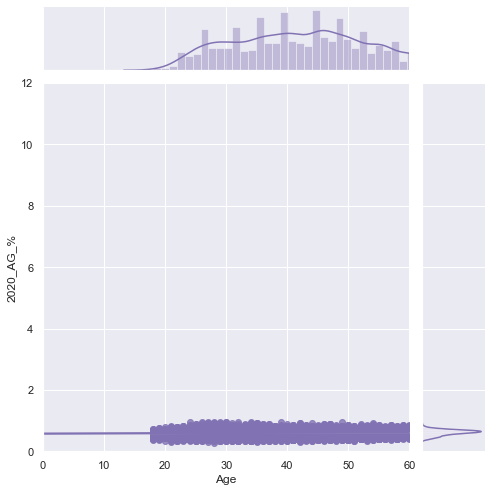

In [13]:
#tips = sns.load_dataset("tips")
g = sns.jointplot("Age", "2020_AG_%", data=bos_19,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [7]:
plt.savefig("output.png")

<Figure size 432x288 with 0 Axes>

Text(0.0, 1.0, 'Actual Finish Time Density by Age')

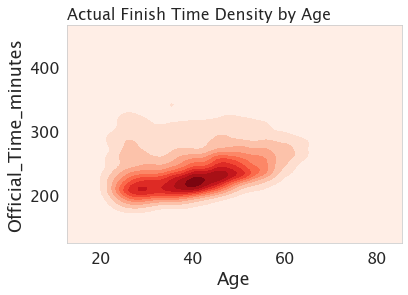

In [135]:
#2D Density; can't use datetime column
sns.kdeplot(females.Age, females['Official_Time_minutes'], cmap="Reds", shade=True)
plt.title('Actual Finish Time Density by Age', loc='left')


Text(0.0, 1.0, 'Actual Finish Time Density by Age')

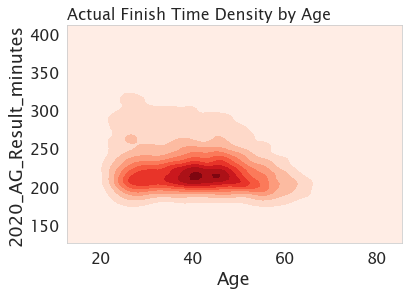

In [136]:
#2D Density; can't use datetime column
sns.kdeplot(females.Age, females['2020_AG_Result_minutes'], cmap="Reds", shade=True)
plt.title('Actual Finish Time Density by Age', loc='left')


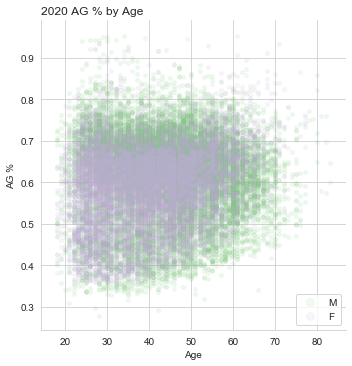

In [71]:
#Putative structure
sns.lmplot( x="Age", y="2020_AG_%", data=bos_19, fit_reg=False, hue='M/F', legend=False, 
           palette="Accent", scatter_kws={"alpha":0.1,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Age')
plt.ylabel('AG %')
plt.title('2020 AG % by Age', loc='left');


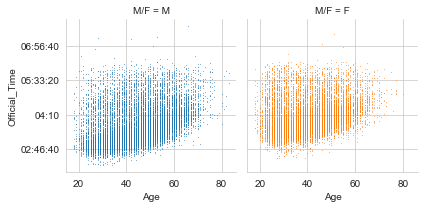

In [136]:
#maybe use
#FacetGrid by Gender

g = sns.FacetGrid(bos_19, col="M/F", hue="M/F", hue_kws=dict(marker=["v","v"]))
g = (g.map(plt.scatter, "Age", "Official_Time", s=.005));

#g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
 #                 hue_order=["Dinner", "Lunch"],
  #                hue_kws=dict(marker=["+", "v"]))
#g = (g.map(plt.scatter, "total_bill", "tip", **kws)
    # .add_legend())

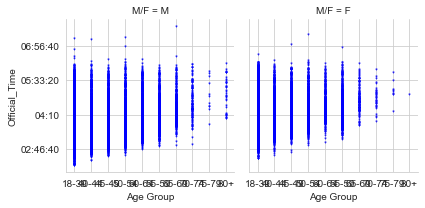

In [118]:
g = sns.FacetGrid(bos_19, col="M/F", hue="M/F", hue_kws=dict(marker=["v","v"]))
g = (g.map(plt.scatter, "Age Group", "Official_Time", s=1, edgecolor="b"))

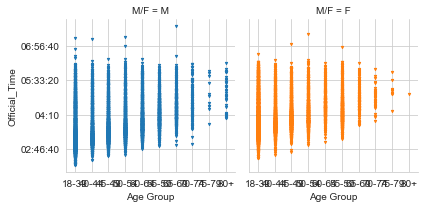

In [121]:
#FacetGrid by Gender
g = sns.FacetGrid(bos_19, col="M/F", hue="M/F", hue_kws=dict(marker=["v","v"]))
g = (g.map(plt.scatter, "Age Group", "Official_Time", s=5))

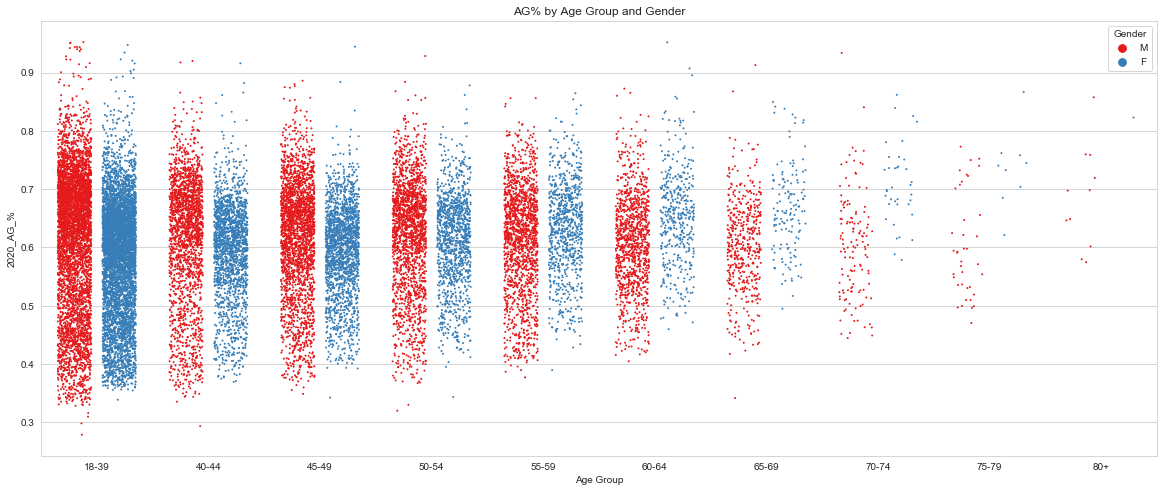

In [17]:
#use
plt.figure(figsize=(20,8))
ax = sns.stripplot(x="Age Group", y="2020_AG_%", hue="Gender",
                   data=bos_19, palette="Set1", dodge=True, jitter=0.3, size=2, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
plt.title('AG% by Age Group and Gender');

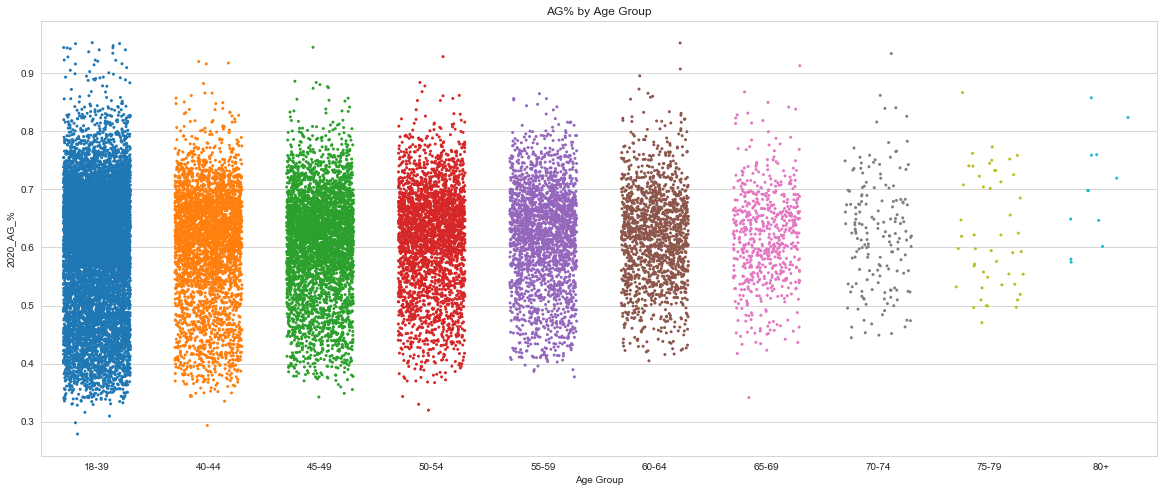

In [182]:
#use
#jitter
plt.figure(figsize=(20,8));

sns.stripplot(bos_19['Age Group'], bos_19['2020_AG_%'], jitter=0.3, size=3, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
plt.title('AG% by Age Group');

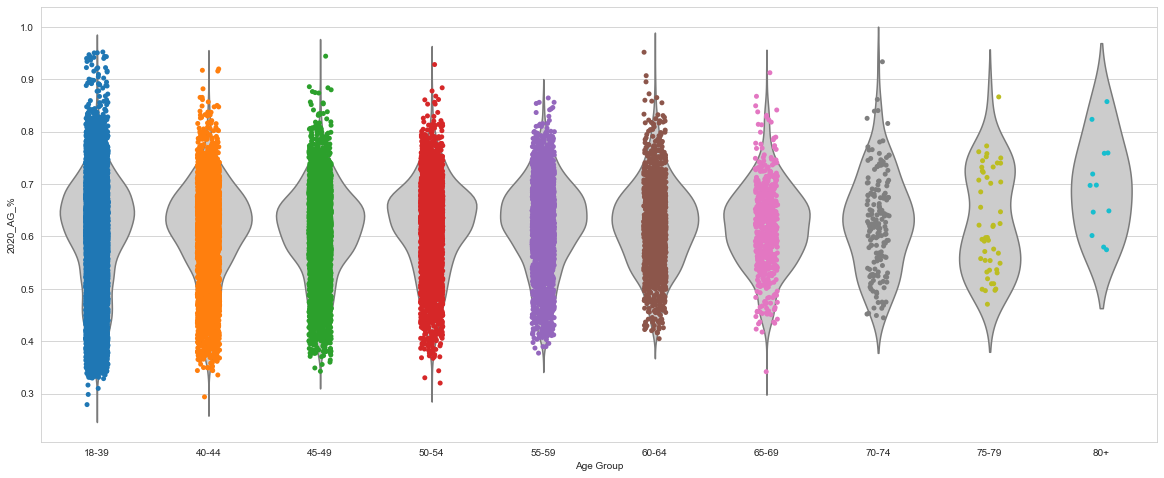

In [199]:
plt.figure(figsize=(20,8))
ax = sns.violinplot(x="Age Group", y="2020_AG_%", data=bos_19,
                    inner=None, color=".8",order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax = sns.stripplot(x="Age Group", y="2020_AG_%", data=bos_19, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])

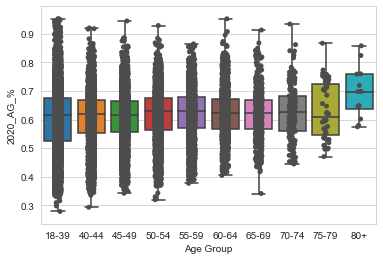

In [200]:
ax = sns.boxplot(x="Age Group", y="2020_AG_%", data=bos_19, whis=np.inf, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax = sns.stripplot(x="Age Group", y="2020_AG_%", data=bos_19, color=".3", order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])

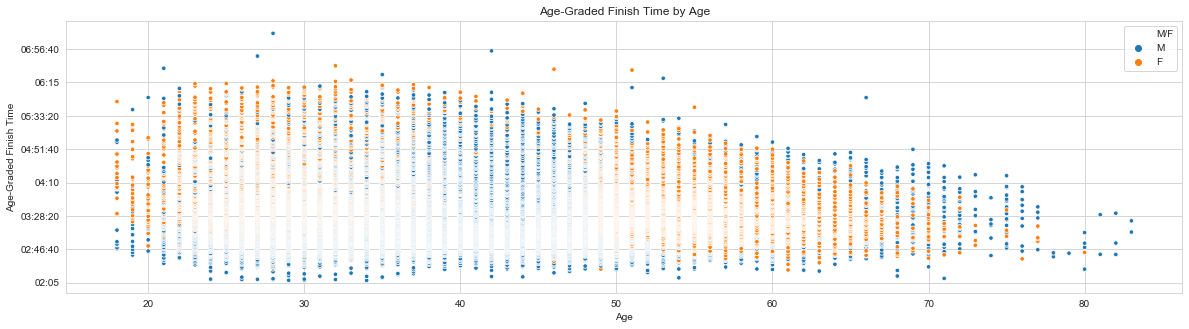

In [196]:
#use
plt.figure(figsize=(20,5))

ax = sns.scatterplot(x="Age", y="2020_AG_Result", hue="M/F",
                     data=bos_19, s=20)
plt.title('Age-Graded Finish Time by Age')
plt.xlabel('Age')
plt.ylabel('Age-Graded Finish Time');

In [27]:
bos_19_by_age_group = bos_19.groupby('Age Group')
print(bos_19_by_age_group)